## Problem Set 13

First the exercises:
* The exercise did not specify a loss function, but let us assume the standard average cross entropy function. To simplify things let us not use biases. Then the logistic regression model involves the following functions:
\begin{align}
f(x,W_1) &= xW_1 \\
g(f) & = e^f \textrm{(pointwise)} \\
p(g) &= \sum \pi_i g \textrm{ (sum across all vectors in sample)} \\
h(g, p) &= g/p \textrm{ (applied sample wise)} \\
logp(p) &= log(p+epsilon) \textrm{ (epsilon is some small constant to avoid underflow)}\\
sub(f,logp) &= f-logp \textrm{ (broadcast) } \\
pl(y,sub) &= y \cdot sub \textrm{ (Hadamard product)} \\
l(p1) &= mean(pl) \textrm{ (samplewise)}\\
al(pl) &=mean(pl) 
\end{align}

Here $h$ yields the predictions, $l$ yields the samplewise cross entropy, $al$ yields the average cross entropy.

Now we have to figure out the weight update rule. For this we need to calculate $\frac{dal}{dW_1}$ by the chain rule.

Here is a simplified form
\begin{align}
 \frac{dal}{dW_1} &= \frac{dal}{dl}(\frac{dl}{dsub} \left(\frac{dsub}{df}\frac{df}{dW_1}+\frac{dsub}{dlogp}\frac{dlogp}{dW_1}\right)\\
 \frac{df}{dW_1}_{(s,a,b,c,d)} &= x_{(s,a,c)}\delta(b==d) \\
 \frac{dlogp}{dW_1} &=\frac{dlogp}{dp}\frac{dp}{dg}\frac{dg}{df}\frac{df}{dW_1}\\
 \frac{dg}{df}_{(s,a,b,c)} &= e^f \delta(s==b)\delta(a==c) \\
 \frac{dp}{dg}_{(s,a,b)} &= \delta(s==b)
\end{align}

### Python Lab

Now let us load our standard libraries.

In [1]:
import numpy as np
import pandas as pd
import keras
from keras.datasets import mnist

Using TensorFlow backend.


Let us load up a sample dataset.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

Label is 1.


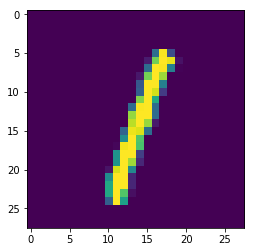

In [6]:
randix = np.random.randint(0,60000)
plt.imshow(x_train[randix])
print("Label is {}.".format(y_train[randix]))

In [7]:
x_train_f = x_train.reshape(60000,-1)

In [8]:
x_train_f.shape

(60000, 784)

In [9]:
x_test_f = x_test.reshape(-1, 28**2)

In [23]:
x_test_f.shape

(10000, 784)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
scaler.fit(x_train_f)

/Users/justin/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
train_x_tr = scaler.transform(x_train_f)

/Users/justin/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [28]:
test_x_tr = scaler.transform(x_test_f)

/Users/justin/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [11]:
from sklearn.preprocessing import OneHotEncoder as OHE

In [12]:
ohe = OHE(sparse = False)
y_train_ohe = ohe.fit_transform(y_train.reshape(-1,1))
y_test_ohe = ohe.fit_transform(y_test.reshape(-1,1))

In [14]:
np.argmax(y_train_ohe[randix]) == y_train[randix]

True

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

In [18]:
logreg = Sequential()

In [19]:
logreg.add(Dense(10,activation='softmax',input_dim = (28**2)))

In [20]:
from keras.optimizers import Adam, SGD

In [22]:
logreg.compile(optimizer=Adam(),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [30]:
history=logreg.fit(train_x_tr, y_train_ohe, validation_split=0.05,
                 epochs=25, batch_size=64)

Train on 57000 samples, validate on 3000 samples
Epoch 1/25
57000/57000 [==============================] - 1s - loss: 0.4622 - acc: 0.8704 - val_loss: 0.2408 - val_acc: 0.9353
Epoch 2/25
57000/57000 [==============================] - 1s - loss: 0.3149 - acc: 0.9145 - val_loss: 0.2305 - val_acc: 0.9420
Epoch 3/25
57000/57000 [==============================] - 1s - loss: 0.2950 - acc: 0.9206 - val_loss: 0.2324 - val_acc: 0.9420
Epoch 4/25
57000/57000 [==============================] - 1s - loss: 0.2844 - acc: 0.9229 - val_loss: 0.2295 - val_acc: 0.9430
Epoch 5/25
57000/57000 [==============================] - 1s - loss: 0.2779 - acc: 0.9256 - val_loss: 0.2262 - val_acc: 0.9433
Epoch 6/25
57000/57000 [==============================] - 1s - loss: 0.2723 - acc: 0.9274 - val_loss: 0.2285 - val_acc: 0.9450
Epoch 7/25
57000/57000 [==============================] - 1s - loss: 0.2681 - acc: 0.9283 - val_loss: 0.2306 - val_acc: 0.9447
Epoch 8/25
57000/57000 [==============================] - 1s -

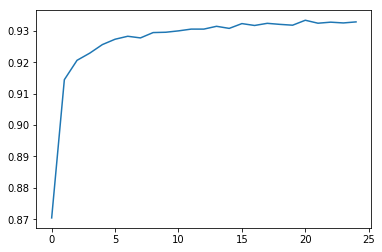

In [37]:
plt.plot(history.history['acc'])

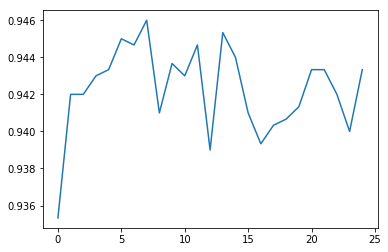

In [38]:
plt.plot(history.history['val_acc'])

In [62]:
deep = Sequential()

In [63]:
deep.add(Dense(256, activation = 'relu', input_dim = (28**2)))

In [64]:
deep.add(Dropout(0.2))

In [65]:
deep.add(Dense(128,activation = 'relu'))

In [66]:
deep.add(Dropout(0.2))

In [67]:
deep.add(Dense(64,activation = 'relu'))

In [68]:
deep.add(Dropout(0.2))

In [69]:
deep.add(Dense(10,activation = 'softmax'))

In [70]:
deep.compile(optimizer=Adam(),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [71]:
history2=deep.fit(train_x_tr, y_train_ohe, validation_split=0.05,
                 epochs=25, batch_size=64)

Train on 57000 samples, validate on 3000 samples
Epoch 1/25
57000/57000 [==============================] - 4s - loss: 0.3828 - acc: 0.8863 - val_loss: 0.1097 - val_acc: 0.9683
Epoch 2/25
57000/57000 [==============================] - 4s - loss: 0.1952 - acc: 0.9437 - val_loss: 0.0968 - val_acc: 0.9753
Epoch 3/25
57000/57000 [==============================] - 4s - loss: 0.1520 - acc: 0.9555 - val_loss: 0.0861 - val_acc: 0.9757
Epoch 4/25
57000/57000 [==============================] - 4s - loss: 0.1281 - acc: 0.9632 - val_loss: 0.0875 - val_acc: 0.9773
Epoch 5/25
57000/57000 [==============================] - 4s - loss: 0.1121 - acc: 0.9671 - val_loss: 0.0897 - val_acc: 0.9777
Epoch 6/25
57000/57000 [==============================] - 4s - loss: 0.0995 - acc: 0.9714 - val_loss: 0.0950 - val_acc: 0.9783
Epoch 7/25
57000/57000 [==============================] - 4s - loss: 0.0922 - acc: 0.9731 - val_loss: 0.0810 - val_acc: 0.9800
Epoch 8/25
57000/57000 [==============================] - 4s -

In [88]:
from keras.layers import Conv2D, GlobalAveragePooling2D

In [83]:
train_x_re = train_x_tr.reshape(-1,28,28,1)

In [93]:
CNN = Sequential()

In [94]:
CNN.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'SAME',input_shape = (28,28,1), activation = 'relu'))

In [95]:
CNN.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'SAME', activation = 'relu'))

In [96]:
CNN.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'SAME', activation = 'relu'))

In [97]:
CNN.add(GlobalAveragePooling2D())

In [98]:
CNN.add(Dense(10,activation='softmax'))

In [99]:
CNN.compile(optimizer=Adam(),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [100]:
history3=CNN.fit(train_x_re, y_train_ohe, validation_split=0.05,
                 epochs=25, batch_size=64)

Train on 57000 samples, validate on 3000 samples
Epoch 1/25
57000/57000 [==============================] - 88s - loss: 1.4696 - acc: 0.4872 - val_loss: 0.8768 - val_acc: 0.7490
Epoch 2/25
57000/57000 [==============================] - 86s - loss: 0.8037 - acc: 0.7588 - val_loss: 0.5660 - val_acc: 0.8610
Epoch 3/25
57000/57000 [==============================] - 86s - loss: 0.5973 - acc: 0.8276 - val_loss: 0.5143 - val_acc: 0.8413
Epoch 4/25
57000/57000 [==============================] - 86s - loss: 0.4874 - acc: 0.8607 - val_loss: 0.3775 - val_acc: 0.8937
Epoch 5/25
57000/57000 [==============================] - 86s - loss: 0.4188 - acc: 0.8808 - val_loss: 0.3267 - val_acc: 0.9067
Epoch 6/25
57000/57000 [==============================] - 86s - loss: 0.3590 - acc: 0.8967 - val_loss: 0.3364 - val_acc: 0.8970
Epoch 7/25
57000/57000 [==============================] - 86s - loss: 0.3227 - acc: 0.9066 - val_loss: 0.2335 - val_acc: 0.9323
Epoch 8/25
57000/57000 [==============================]